# 클래스

In [1]:
# class 연습하기

class Man:
    def __init__(self, name):
        self.name = name
        print ('Initialized!')
        
    def hello(self):
        print ('Hello ' + self.name + '!')
        
    def goodbye(self):
        print ('Good-bye ' + self.name + '!')
        
m = Man('David')
m.hello()
m.goodbye()

Initialized!
Hello David!
Good-bye David!


# 넘파이 가져오기

In [10]:
import numpy as np

In [3]:
x = np.array([1.0, 2.0, 3.0])
print (x)
print (type(x))

[1. 2. 3.]
<class 'numpy.ndarray'>


In [4]:
x = np.array([1.0, 2.0, 3.0])
y = np.array([2.0, 3.0, 4.0])
print (x+y)
print (x-y)
print (x*y)
print (x/y)
print (x/2)

[3. 5. 7.]
[-1. -1. -1.]
[ 2.  6. 12.]
[0.5        0.66666667 0.75      ]
[0.5 1.  1.5]


In [19]:
A = np.array([[1,2], [3,4]])
print (A)
print (A.shape)
print (A.dtype)

B = np.array([[3, 0], [0, 6]])
print (A+B)

[[1 2]
 [3 4]]
(2, 2)
int64
[[ 4  2]
 [ 3 10]]


In [20]:
print (A*10)

[[10 20]
 [30 40]]


In [21]:
import matplotlib.pyplot as plt

x = np.arange(0, 6, 0.1)
y1 = np.sin(x)
y2 = np.cos(x)

plt.plot(x, y1, label='sin')
plt.plot(x, y2, linestyle='--', label='cos')
plt.xlabel('x')
plt.ylabel('y')
plt.title('sin & cos')
plt.legend()
plt.show()

<Figure size 640x480 with 1 Axes>

<function matplotlib.pyplot.show(*args, **kw)>

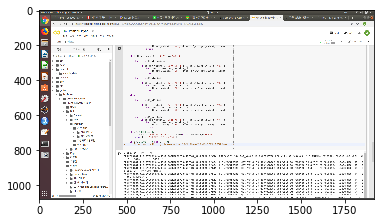

In [8]:
from matplotlib.image import imread

img=imread('test.png')

plt.imshow(img)
plt.show

# 2. 퍼셉트론

---

__퍼셉트론__(perceptron)이란 프랑크 로젠블라트(Frank Rosenblatt)가 1957년에 고안한 알고리즘이다.

퍼셉트론은 딥러닝의 기원이 되는 알고리즘이기 때문에 배워야 한다.

### 목표

 1. 퍼셉트론을 이용하여 기본적인 AND, OR, NAND gate 만들기. 
 2. 1에서 만든 회로을 조합하여 XOR를 만들기


### 퍼셉트론이란?
퍼셉트론의 작동방식은 상당히 직관적이기 때문에 사진과 수식을 보면 바로 이해가 될 것이다.






$$y = 
 \begin{cases} 
    0 \quad(w_1x_1 + w_2x_2 \leq \theta)\\
    1 \quad(w_1x_1 + w_2x_2 > \theta) \qquad 식[1]\\
  \end{cases}  
$$ 


$$y = 
 \begin{cases} 
    0 \quad(b + w_1x_1 + w_2x_2 \leq 0)\\
    1 \quad(b + w_1x_1 + w_2x_2 > 0)\qquad 식[2]\\ 
  \end{cases}  
$$ 




퍼셉트론에서 AND, OR, NAND gate의 구조적 차이는 없고 가중치 $w_i,\, b$차이이다.

그래서 가중치와 임계값에 따라 gate가 달라질 수 있다. 

### AND, NAND, OR gate

In [11]:
def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([.5, .5])
    b = -0.7
    tmp = np.sum(w*x)+b
    if tmp <= 0:
        return 0
    else:
        return 1
    
def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-.5, -.5])
    b = .7
    tmp = np.sum(w*x)+b
    if tmp <= 0:
        return 0
    else:
        return 1
    
def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([.5, .5])
    b = -.2
    tmp = np.sum(w*x)+b
    if tmp <= 0:
        return 0
    else:
        return 1


In [14]:
print ("AND(0,0) : {0}, NAND(0,0) : {1}, OR(0,0) : {2}".format(AND(0,0), NAND(0,0), OR(0,0)))
print ("AND(1,0) : {0}, NAND(1,0) : {1}, OR(1,0) : {2}".format(AND(1,0), NAND(1,0), OR(1,0)))
print ("AND(0,1) : {0}, NAND(0,1) : {1}, OR(0,1) : {2}".format(AND(0,1), NAND(0,1), OR(0,1)))
print ("AND(1,1) : {0}, NAND(1,1) : {1}, OR(1,1) : {2}".format(AND(1,1), NAND(1,1), OR(1,1)))

AND(0,0) : 0, NAND(0,0) : 1, OR(0,0) : 0
AND(1,0) : 0, NAND(1,0) : 1, OR(1,0) : 1
AND(0,1) : 0, NAND(0,1) : 1, OR(0,1) : 1
AND(1,1) : 1, NAND(1,1) : 0, OR(1,1) : 1


### XOR gate

<img src="../deep_learning_images/XOR.png"  width="30%" height="30%" />

AND, NAND, ORgate는 선형영역만 나눌 수 있는데 XORgate는 위와 같이 비선형영역도 나눌 수 있다.

<img src="../deep_learning_images/XORgate.png"  width="30%" height="30%" />


In [15]:
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y    

In [17]:
print ('XOR(0,0) : ', XOR(0,0))
print ('XOR(1,0) : ', XOR(1,0))
print ('XOR(0,1) : ', XOR(0,1))
print ('XOR(1,1) : ', XOR(1,1))

XOR(0,0) :  0
XOR(1,0) :  1
XOR(0,1) :  1
XOR(1,1) :  0


# 3 신경망

---

__신경망__(neural network)이란 여러개의 퍼셉트론이 층을 이룬 구조이다. 

일반적으로 3개의 층으로 구성되어 있다. 첫 번째 층을 입력층, 두 번째 층을 은닉층, 마지막 층을 출력층이라고 한다.

<img src="../deep_learning_images/ann.png"  width="30%" height="30%" />



## 활성화 함수

중간에 은닉층을 보면 여러 입력층의 값을 받아 출력층으로 내보내는 것을 볼 수 있다. 

이때 입력 신호의 총합을 출력 신호로 변환해주는 함수를 활성화 함수라고 한다.

앞으로 입력 신호의 총합을 $ a = b + w_1x_1 + w_2x_2 $, 활성화 함수를 $ h(a) $라고 하자

### 시그모이드 함수  

<img src="../deep_learning_images/sigmoid.png"  width="30%" height="30%" />

$$ h(a) = {{1} \over {1+\exp(-a)}} $$


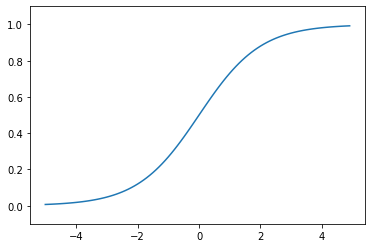

In [22]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) #y축 범위 지정
plt.show()

### 계단 함수

<img src="../deep_learning_images/step_func.png"  width="30%" height="30%" />

$$ h(a) = 
\begin{cases} 
    1 \quad(a > 0) \\
    0 \quad(a \leq 0)\\
  \end{cases}$$

In [24]:
# 방법 1
def step_function(x):
    y = x > 0
    return y.astype(np.int)    

x = np.array([-1.0, 1.0, 2.0])
y = x > 0
print (y)

y = y.astype(np.int)
print (y)

[False  True  True]
[0 1 1]


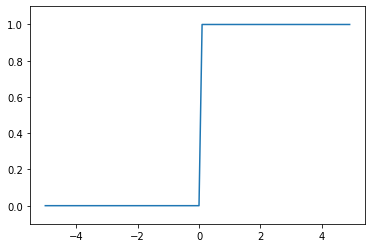

In [26]:
# 방법 2
def step_function(x):
    return np.array(x > 0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y축의 범위 지정
plt.show()

### ReLU함수

<img src="../deep_learning_images/relu.png"  width="30%" height="30%" />

$$ h(a) = 
\begin{cases} 
    a \quad(a > 0) \\
    0 \quad(a \leq 0)\\
  \end{cases}$$

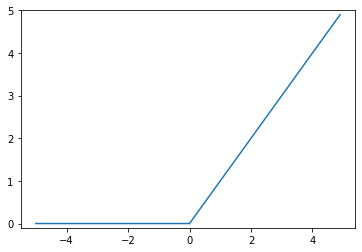

In [28]:
def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-0.1, 5.0) # y축의 범위 지정
plt.show()

## 다차원 배열

수 많은 데이터를 효율적으로 계산하기 위해 다차원 배열의 계산은 필수적이다!!

### 행렬곱

행렬 곱셈을 위해 numpy.dot() 함수를 이용한다.

$ A \times B = C $라는 행렬 계산을 할 때 반드시 A의 열 크기와 B의 행 크기가 일치해야 한다!


<img src="../deep_learning_images/dot.png"  width="30%" height="30%" />

$$ A \in M^{3\times2}, B \in M^{2\times1}, C \in M^{3\times1} $$

In [26]:
A =  np.array([[1,2], [3,4], [5,6]])
print (A.shape)

B = np.array([7, 8])
print (B.shape)
print (np.dot(A, B))

(3, 2)
(2,)
[23 53 83]


### 신경망에서의 행렬 곱

<img src="../deep_learning_images/ann_dot.png"  width="70%" height="30%" />

In [31]:
X = np.array([1,2])
print (X.shape)

W = np.array([[1, 3, 5], [2, 4, 6]])
print (W)
print (W.shape)

Y = np.dot(X, W)
print (Y)

(2,)
[[1 3 5]
 [2 4 6]]
(2, 3)
[ 5 11 17]


## 3층 신경망 구현하기

입력층 2개, 첫 번째 은닉층은 3개, 두 번째 은닞층은 2개, 출력층은 2개의 뉴런으로 구성된 3층 신경망을 만들어보자!

<img src="../deep_learning_images/3_layer.png"  width="50%" height="30%" />



### 각 층의 신호 전달 구현하기

입력층에서 첫 번째 은닉층으로!

<img src="../deep_learning_images/input2hidden.png"  width="50%" height="30%" />

In [32]:
#입력층에서 1층으로

X = np.array([1.0 , 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1= np.array([.1, .2, .3])

print (W1.shape)
print (X.shape)
print (B1.shape)

A1 = np.dot(X, W1) + B1
Z1 = sigmoid(A1)

print (A1)
print (Z1)

(2, 3)
(2,)
(3,)
[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


첫 번쨰 은닉층에서 두 번째 은닉층으로!

<img src="../deep_learning_images/hidden2hidden.png"  width="50%" height="30%" />

In [33]:
#1층에서 2층으로

W2 = np.array([[0.1, 0.4], [0.2, 0.5], [.3, .6]])
B2= np.array([.1, .2])

print (Z1.shape)
print (W2.shape)
print (B2.shape)

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

print (A2)
print (Z2)

(3,)
(3, 2)
(2,)
[0.51615984 1.21402696]
[0.62624937 0.7710107 ]


두 번째 은닉층에서 출력층으로!!

<img src="../deep_learning_images/hidden2out.png"  width="50%" height="30%" />

In [35]:
# 출력층의 활성화 함수로 항등 함수를 사용했다.
def identify_function(x):
    return x

W3 = np.array([[.1, .3], [.2, .4]])
B3 = np.array([.1, .2])

A3 = np.dot(Z2, W3) + B3
Y = identify_function(A3) # 혹은 Y = A3

### 구현 정리

In [36]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([.1, .2, .3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [.3, .6]])
    network['b2'] = np.array([.1, .2])
    network['W3'] = np.array([[.1, .3], [.2, .4]])
    network['b3'] = np.array([.1, .2])
    
    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identify_function(a3)
    
    return y

network = init_network()
x = np.array([1.0, .5])
y = forward(network, x)
print (y)

[0.31682708 0.69627909]


## 출력층 설계하기

### 항등 함수와 소프트맥스 함수 구현하기(항등함수는 생략)

$$y_k = {{\exp(a_k)} \over {\sum_{i=1}^{n} \exp(a_i)}}$$

<img src="../deep_learning_images/softmax.png" width="20%" height="20%" /> 

In [43]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

### 소프트맥스 함수 구현 시 주의점

큰 값을 그대로 지수로 넘겨버리면 컴퓨터가 표현할 수 있는 수를 넘어버리기 때문에 임의의 상수(입력값 중 최댓값)를 빼준 다음 지수로 넘겨준다.

$$\begin{align*}y_k = {\exp(a_k) \over \sum_{i=1}^n \exp(a_i)} &=  {C\exp(a_k) \over C\sum_{i=1}^n \exp(a_i)} \\ &=  {\exp(a_k + \log C) \over \sum_{i=1}^n \exp(a_i + \log C)} \\ &=  {\exp(a_k + C') \over \sum_{i=1}^n \exp(a_i + C')}\end{align*}  $$

In [37]:
a = np.array([1010, 1000, 990])
print (np.exp(a) / np.sum(np.exp(a)))

c = np.max(a)
print (a-c)
print (np.exp(a-c) / np.sum(np.exp(a-c)))

[nan nan nan]
[  0 -10 -20]
[9.99954600e-01 4.53978686e-05 2.06106005e-09]


/home/jiho8732/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


## 손글씨 숫자 인식

### MNIST 데이터셋

load_mnist함수는 읽은 MNIST 데이터를 (__훈련 이미지, 훈련 레이블__), (__시험 이미지, 시험 레이블__) 형식으로 반환합니다.

파라미터로는 normalize, flatten, one_hot_label이 있습니다.

    * normalize     : 입력 이미지의 픽셀값을 0.0~1.0 사이의 값으로 정규화
    * flatten       : 입력 이미지를 1차원 배열로 만듬
    * one_hot_label : 원핫인코딩 형태로 저장
    
    


파이썬에는 __pickle__이라는 편리한 기능이 있다. 프로그램 실행 중에 특정 객체를 파일로 저장한다. 저장해둔 pickle 파일을 로드하면 실행 당시 객체를 즉시 복원할 수 있다.

In [44]:
import sys, os
sys.path.append(os.pardir)   # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from dataset.mnist import load_mnist

# 처음 한 번은 몇 분 정도 걸립니다.
(x_train, t_train), (x_test, t_test) = \
    load_mnist(flatten=True, normalize=False)

# 각 데이터의 형상 출력
print (x_train.shape) # (60000, 784)
print (t_train.shape) # (60000,)
print (x_test.shape)  # (10000, 784)
print (t_test.shape)  # (10000,)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


### 신경망의 추론 처리

입력층 뉴런 : 784개            # 이미지 크기가 28$\times$28

출력층 뉴런 : 10개             # 구분해야 되는 숫자가 0~9


첫 번째 은닉층 뉴런 : 50개

두 번쨰 은닉층 뉴런 : 100개     # 임의로 정함

In [47]:
import pickle

def get_data():
    # 정규화를 했고 1차원 배열로 만들었다.
    (x_train, t_train), (x_test, t_test) = \
        load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

def init_network():
    with open('sample_weight.pkl', 'rb') as f:
        network = pickle.load(f)
        
    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    
    return y

x, t = get_data()
network = init_network()

accuracy_cnt = 0

for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y) # 확률이 가장 높은 원소의 인덱스를 얻는다.
    if p == t[i]:
        accuracy_cnt += 1
        

print ('Accuracy : ' + str(float(accuracy_cnt) / len(x)))        

Accuracy : 0.9352


### 배치 처리

효율적을 계산하기 위해 100개의 데이터를 한 묶음로 설정해 학습시킨다. 이때 묶음을 __배치__라 부른다.

<img src="../deep_learning_images/matsizeflow.png" width="50%" height="50%" /> 

In [49]:
x, _ = get_data()
x = x[:100]
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']

print (x.shape)
print (x[0].shape)
print (W1.shape)
print (W2.shape)
print (W3.shape)

(100, 784)
(784,)
(784, 50)
(50, 100)
(100, 10)


In [50]:
x, t = get_data()
network = init_network()

batch_size = 100 # 배치 크기
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])
    
print ('Accuracy : ' + str(float(accuracy_cnt) / len(x)))    

Accuracy : 0.9352


In [51]:
'''
<argmax에 대한 예시>
argmax함수 파라미터'axis'를 기준으로 값이 가장 큰 값의 인덱스를 반환한다.
'''
x = np.array([[.1, .8, .1], [.3, .1, .6], [.2, .5, .3], [.8, .1, .1]])
y = np.argmax(x, axis=1)
print (y)

[1 2 1 0]


In [52]:
y = np.array([1, 2, 1, 0])
t = np.array([1, 2, 0, 0])
print (y==t)
print (np.sum(y==t))

[ True  True False  True]
3


## 이번 장에서 배운 내용

    * 신경망에서는 활성화 함수로 시그모이드 함수와 ReLU함수 같은 매끄럽게 변화하는 함수를 이용한다.
    * 넘파이의 다차원 배열을 잘 사용하면 신경망을 효율적으로 구현할 수 있다.
    * 기계학습 문제는 크게 회귀와 분류로 나눌 수 있다.
    * 출력층의 활성화 함수로는 회귀에서는 주로 항등 함수를, 분류에서는 주로 소프트맥스 함수를 이용한다.
    * 분류에서는 출력층을 뉴런 수를 분류하려는 클래스 수와 같게 설정한다.
    * 입력 데이터를 묶은 것을 배치라 하며, 추론 처리를 이 배치 단위로 진행하면 결과를 훨씬 빠르게 얻을 수 있다.


# 신경망 학습

__학습__이란 훈련 데이터로부터 가중치 매개변수의 최적값을 자동으로 획득하는 것을 뜻한다.

이번 장에서는 신경망이 학습할 수 있도록 해주는 __지표__인 손실 함수를 다룰 것이다.

손실 함수의 결괏값을 가장 작게 만드는 가중치 매개변수를 찾아라!!

가장 작게 만들기 위해 함수의 기울기를 활용하는 경사법을 사용하자!

## 손실 함수

### 평균 제곱 오차(Mean Square Error, MSE)

$$ E = {1 \over 2} \sum_{k}(y_k-t_k)^2 $$

$y_k$는 신경망의 출력값

$t_k$는 정답 레이블

k는 데이터의 차원 수

In [53]:
def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)


# 정답은 2
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# 예1 : '2'일 확률이 가장 높다고 추정함 (0.6)
y = [.1, .05, .6, 0, .05, .1, 0, .1, 0, 0]
print (mean_squared_error(np.array(y), np.array(t)))

# 예2 : '7'일 확률이 가장 높다고 추정함 (.6)
y = [.1, .05, .1, 0, .05, .1, 0, .6, 0, 0]
print (mean_squared_error(np.array(y), np.array(t)))

0.09750000000000003
0.5975


### 교차 엔트로피 오차(Cross Entropy Error, CEE)

$$ E=-\sum_{k}t_k\log y_k$$

이 문제에선 $y_k$는 신경망의 출력, $t_k$는 주어진 정답 레이블

<질문>

$t_k$가 원핫인코딩형태로 출력이 된다면 CEE는 실질적으로 그냥 $E= -\sum_{k}\log y_k$ 아닌가...?

In [58]:
def cross_entropy_error(y, t):
    #미소량 delta를 더해준 이유는 만약 y=0이라면 log값이 음의 무한대로 가버리는 것을 방지하기 위함이다/
    delta = 1e-7
    return -np.sum(t*np.log(y + delta))

t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [.1, .05, .6, 0, .05, .1, 0, .1, 0, 0]
print (cross_entropy_error(np.array(y), np.array(t)))

y = [.1, .05, .1, 0, .05, .1, 0, .6, 0, 0]
print (cross_entropy_error(np.array(y), np.array(t)))

0.510825457099338
2.302584092994546


### 미니배치 학습

$$ E = -{1 \over N}\sum_{n}\sum_{k}t_{nk}logy_{nk}$$

총 데이터가 $N$개, $t_{nk}$는 $n$ 번째 데이터의 $k$ 번째 값을 의미한다. 

미니배치 사이즈가 100일 때 $t_{21}$은 전체 데이터에서 201번째 데이터를 의미한다.

In [54]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

print (x_train.shape) # (60000, 784)
print (t_train.shape) # (60000, 10)

(60000, 784)
(60000, 10)


In [55]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [57]:
# np.random.choice()
# 지정한 범위의 수 중에서 무작위로 원하는 개수의 인덱스를 반환한다.

print (np.random.choice(60000, 10))

[24820 23343 43869 51255 12025 29077 45538  2650 39743 25787]


### (배치용) 교차 엔트로피 오차 구현하기

In [48]:
# 정답레이블이 원핫인코딩인 경우
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]    
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

In [61]:
# 정답레이블이 숫자레이블로 주어진 경우
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]    
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size


'''
<y[np.arange(batch_size), t] 설명>

예를 들어 batch_size=5이면 np.arange(batch_size)=[0, 1, 2, 3, 4] 이 때의 t=[2, 7, 0, 9, 4]이다.
y[np.arange(batch_size), t]=[y[0, 2], y[1, 7], y[2, 0], y[3, 9], y[4, 4]]인 numpy배열

<질문>
그런데 위의 함수를 보면 shape이 (1,y.size)이다. y[0,2]는 존재할 수 있어도 y[1,7], y[2,0] 같은 위치가 존재할 수 있나??
'''



'\n<y[np.arange(batch_size), t] 설명>\n\n예를 들어 batch_size=5이면 np.arange(batch_size)=[0, 1, 2, 3, 4] 이 때의 t=[2, 7, 0, 9, 4]이다.\ny[np.arange(batch_size), t]=[y[0, 2], y[1, 7], y[2, 0], y[3, 9], y[4, 4]]인 numpy배열\n\n<질문>\n그런데 위의 함수를 보면 shape이 (1,y.size)이다. y[0,2]는 존재할 수 있어도 y[1,7], y[2,0] 같은 위치가 존재할 수 있나??\n'

### 왜 손실 함수를 설정하는가?

높은 정확도를 원한다면 정확도를 올리면 되는데 왜 굳이 '손실 함수의 값'을 주목하는 걸까?

최적의 매개변수를 탐색할 때 손실 함수의 값을 가능한 한 작게 하는 매개변수 값을 찾는다.

이때 매개변수의 미분을 계산하고, 그 미분 값을 단서로 매개변수의 값을 서서히 갱신하는 과정을 반복하기 때문이다.

그리고 정확도를 지표로 삼을 수 없는 이유는 미분 값이 대부분의 장소에서 0이 되어 매개변수를 갱신할 수 없기 때문이다.

## 수치 미분

### 미분

$${df(x) \over dx} = \lim_{h\to0} {f(x+h)-f(x) \over h}$$

In [62]:
# 나쁜 구현 예
# h값이 너무 작아 컴퓨터가 0으로 인식한다.
def numerical_diff(f, x):
    h = 10e-50
    return (f(x+h) - f(x)) / h

In [63]:
# 개선된 구현 예
#(x+h)와ㅏ (x-h)일 때의 함수f의 차분을 계산해 오차를 줄인다.
def numerical_diff(f, x):
    h = 1e-4    # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)

### 수치 미분의 예

In [52]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

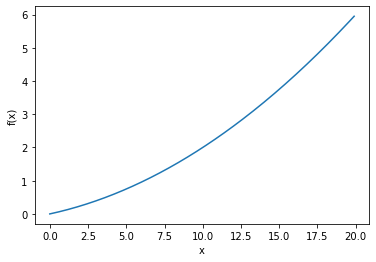

In [53]:
x = np.arange(0, 20, .1) # 0에서 20까지 0.1 간격의 배열 x를 만든다(20은 미포함)
y = function_1(x)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x, y)
plt.show()

In [54]:
print (numerical_diff(function_1, 5))
print (numerical_diff(function_1, 10))

0.1999999999990898
0.2999999999986347


### 편미분

In [55]:
def function_2(x):
    return x[0]**2 + x[1]**2
    # 또는 return np.sum(x**2)

In [56]:
# 문제1 x_0 = 3, x_1 = 4일 때, x_0에 대한 편미분을 구하라.
def function_tmp1(x0):
    return x0*x0 + 4.0**2
print (numerical_diff(function_tmp1, 3.0))

def function_tmp2(x1):
    return 3**2 + x1*x1
print (numerical_diff(function_tmp2, 4))

6.00000000000378
7.999999999999119


## 기울기

In [57]:
def numerical_gradient(f, x):
    h = 1e-4  # 0.0001
    grad = np.zeros_like(x)  # x와 형상이 같은 배열을 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h) 계산
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
        
    return grad

In [58]:
print (numerical_gradient(function_2, np.array([3.0, 4.0])))
print (numerical_gradient(function_2, np.array([0, 2.0])))
print (numerical_gradient(function_2, np.array([3.0, 0])))

[6. 8.]
[0. 4.]
[6. 0.]


### 경사법(경사 하강법)

각 지점에서 함수의 값을 낮추는 방안을 제시하는 지표가 기울기이다.

그러나 기울기가 가리키는 곳에 정말 함수의 최솟값이 있는지는 보장할 수 없다.

실제로 복잡한 함수에서는 기울기가 가리키는 방향에 최솟값이 없는 경우가 대부분이다.

$$x_0 = x_0 - \eta{\partial f \over \partial x_0}$$
$$x_1 = x_1 - \eta{\partial f \over \partial x_1}$$
$\eta$는 __학습률__(learning rate)라고 한다.

In [59]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
        
    return x    

In [60]:
def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])
print (gradient_descent(function_2, init_x = init_x, lr=0.1, step_num=100))

[-6.11110793e-10  8.14814391e-10]


In [61]:
# 학습률이 너무 큰 예 : lr=10
init_x = np.array([-3.0, 4.0])
print (gradient_descent(function_2, init_x=init_x, lr=10, step_num=100))

# 학습률이 너무 작은 예 : lr=1e-10
init_x = np.array([-3.0, 4.0])
print (gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100))

[-2.58983747e+13 -1.29524862e+12]
[-2.99999994  3.99999992]


### 신경망에서의 기울기

사이즈가 $2\times3$, 가중치가 __W__, 손실 함수가 __L__로 예를 들어 보자.

이때 경사는 ${\partial L \over \partial \textbf{W}}$이다. 수식은 다음과 같다.

$$ \textbf{W} = \begin{pmatrix} w_{11} & w_{12} & w_{13} \\ w_{21} & w_{22} & w_{23} \end{pmatrix}$$
$$ {\partial L \over \partial \textbf{W}} = \begin{pmatrix} {\partial L \over \partial w_{11}} & {\partial L \over \partial w_{12}} & {\partial L \over \partial w_{13}} \\ {\partial L \over \partial w_{21}} & {\partial L \over \partial w_{22}} & {\partial L \over \partial w_{23}} \end{pmatrix}$$

In [65]:
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2, 3) # 정규분포로 초기화
        
    def predict(self, x)    :
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        
        return loss

In [66]:
net = simpleNet()
print (net.W)

x = np.array([.6, .9])
p = net.predict(x)
print (p)
print (np.argmax(p))

t = np.array([0, 0, 1])
print (net.loss(x, t))


[[ 0.79119826 -1.36844391 -0.22465247]
 [ 0.67290516  1.20115419  0.97860445]]
[1.0803336  0.25997243 0.74595253]
0
1.1026602755641617


In [67]:
def f(W):
    return net.loss(x, t)

dW = numerical_gradient(f, net.W)
print (dW)

'''
더 쉬운 방법
f = lambda W : net.loss(x, t)
dW = numerical_gradient(f, net.W)
'''

[[ 0.27828614  0.12252176 -0.4008079 ]
 [ 0.4174292   0.18378265 -0.60121185]]


'\n더 쉬운 방법\nf = lambda W : net.loss(x, t)\ndW = numerical_gradient(f, net.W)\n'

## 학습 알고리즘 구현하기

1. 미니배치
   
   훈련 데이터 중 일부를 무작위로 가져온다. 이렇게 선별한 데이터를 미니배치라 하며, 그 미니배치의 손실 함수 값을 줄이는 것이 목표
   
   (이때 데이터를 미니배치로 무작위로 선정하기 때문에 __확률적 경사 하강법__(Stochastic gradient descent. aka __SGD__)라고 한다.)


2. 기울기 산출
   
   미니배치의 손실 함수 값을 줄이기 위해 각 가중치 매개변수의 기울기를 구한다. 기울기는 손실 함수의 값을 가장 작게 하는 방향을 제시한다.
 

3. 매개변수 갱신
   
   가중치 매개변수를 기울기 방향으로 아주 조금 갱신합니다.
   

4. 반복
   
   1~3단계를 반복한다. 

### 2층 신경망 클래스 구현하기

In [68]:
import sys, os
sys.path.append(os.pardir)
from common.functions import *
from common.gradient import numerical_gradient

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=.01):
        # 가충치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
        
        
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
    
        return y


    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
    
        return cross_entropy_error(y, t)


    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
    
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy


    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
    
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
    
        return grads

In [72]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
print (net.params['W1'].shape) # (784, 100)
print (net.params['b1'].shape) # (100,)
print (net.params['W2'].shape) # (100, 10)
print (net.params['b2'].shape) # (10,)

(784, 100)
(100,)
(100, 10)
(10,)


In [73]:
x = np.random.rand(100, 784) # 더미 입력 데이터 (100장 분량)
y = net.predict(x)

In [74]:
x = np.random.rand(100, 784) # 더미 입력 데이터 (100장 분량)
t = np.random.rand(100, 10)  # 더미 정답 레이블 (100장 분량)

grads = net.numerical_gradient(x, t) # 기울기 계산

print (grads['W1'].shape) # (784, 100)
print (grads['b1'].shape) # (100,)
print (grads['W2'].shape) # (100, 10)
print (grads['b2'].shape) # (10,)

(784, 100)
(100,)
(100, 10)
(10,)


### 미니배치 학습 구현하기

In [ ]:
import numpy as np
from dataset.mnist import load_mnist
from ch04.two_layer_net import TwoLayerNet

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []

# 하이퍼파라미터
iters_num = 10000 # 반복 횟수
train_size = x_train.shape[0]
batch_size = 100 # 비니배치 크기
learning_rate = .1

network = TwoLayerNet(input_size = 784, hidden_size = 100, output_size = 10)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    #기울기 계산
    grad = network.numerical_gradient(x_batch, t_batch)
    # grad = network.gradient(x_batch, t_batch) # 성능 개선판!!
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
        
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

<img src="../deep_learning_images/miniloss.png" width="80%" height="50%" /> 

### 시험 데이터로 평가하기

In [ ]:
import numpy as np
from dataset.mnist import load_mnist
from ch04.two_layer_net import TwoLayerNet

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size = 784, hidden_size = 50, output_size = 10)

iters_num = 10000 # 반복 횟수
train_size = x_train.shape[0]
batch_size = 100 # 비니배치 크기
learning_rate = .1


train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    grad = network.numerical_gradient(x_batch, t_batch)
    # grad = network.gradient(x_bathc, t_batch) # 성능 개선판!
    
    # 매개변수 갱신
    for ket in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
        
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print (('train acc, test acc : ' + str(train_acc) + ', ' + str(test_acc))

<img src="../deep_learning_images/trainNtest_acc.png" width="50%" height="20%" /> 

## 이번 장에서 배운 내용

    * 기계학습에서 사용하는 데이터셋은 훈련 데이터와 실험 데이터로 나눠 사용한다.
    * 훈련 데이터로 학습한 모델의 범용 능력을 시험 데이터로 평가한다.
    * 신경망 학습은 손실 함수를 지표로 손실
    * 함수의 값이 작아지는 방향으로 가중치 매개변수를 갱신한다.
    * 가중치 매개변수를 갱신할 때는 가중치 매개변수의 기울기를 이용하고, 기울어진 방향으로 가중치의 값을
      갱신하는 작업을 반복ㅎ나다.
    * 아주 작은 값을 주었을 때의 차분으로 미분하는 것을 수치 미분이라고 한다.
    * 수치 미분을 이용해 가중치 매개변수의 기울기를 구할 수 있다.
    * 수치 미분을 이용한 계산에는 시간이 걸리지만, 그 구현은 간단하다. 한편, 다음 장에서 구현하는 (다소 복잡한)
      오차역전파법은 기울기를 고속으로 구할 수 있다.

# 5. 오차역전파법

앞 장에서는 수치 미분을 통해 가중치의 매개변수의 기울기를 구했는데 시간이 오래 걸린다는 단점이 있다.

이번 장에서 __오차역전파법__을 통해 매개변수의 기울기를 효율적으로 계산해보자!

## 계산 그래프

__계산 그래프__는 계산 과정을 그래프로 나타낸 것이다.

여기서 그래프는 그래프 자료구조로, __노드__와 __에지__로 표현된다.

### 곱셈 노드의 역전파

$ z = xy $라는 식을 생각해보자.

$${\partial z \over \partial x} = y$$
$${\partial z \over \partial y} = x$$

<img src="../deep_learning_images/backprop.png" width="70%" height="50%" /> 

곱셈 노트 역전파는 상류의 값에 순전파 때의 입력 신호들을 바꿔 곱해서 하류로 보낸다.


### 5.4.1 곱셈 계층

흐음...그냥 대충 이해하자면 알겠는데 왜 다시 생각해보면 뭔가 찝찝하네...

뭐 떄문에 그렇지??

In [ ]:
class MulLayer:
    def __init__(self):
        self.x = None
        self.y = None

    def forward(self, x, y):
        self.x = x
        self.y = y                
        out = x * y

        return out

    def backward(self, dout):
        dx = dout * self.y  # x와 y를 바꾼다.
        dy = dout * self.x

        return dx, dy

In [ ]:
apple = 100
apple_num = 2
tax = 1.1

# 계층들
mul_apple_layer = MulLayer()
mul_tax_layer = MulLayer

# 순전파
apple_price = mul_apple_layer.forward(apple, apple_num)
price = mul_tax_layer.forward(apple_price, tax)

print (price) # 200

In [ ]:
dprice = 1
dapple_price, dtax = mul_tax_layer.backward(dprice)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)

print (dapple, dapple_num, dtax) # 2.2 110 200

### 5.4.2 덧셈 계층

In [ ]:
class AddLayer:
    def __init__(self):
        pass
    
    def forward(self, x, y):
        out = x + y
        return out
    
    def  backward(self, dout):
        dx = dout * 1
        dy = dout * 1
        return dx, dy

In [ ]:
apple = 100
apple_num = 2
orange = 150
orange_num = 3
tax = 1.1

# 계층들 
mul_apple_layer = MulLayer()
mul_orange_layer = MulLayer()
add_apple_orange_layer = MulLayer()
mul_tax_layer = MulLayer()

# 순전파
apple_price = mul_apple_layer.forward(apple, apple_num) # (1)
orange_price = mul_orange_layer.forward(orange, orange_num) # (2)
all_price = add_apple_orange_layer.forward(apple_price, orange_price) # (3)
price = mul_tax_layer.forward(all_price_tax) # (4)

# 역전파
dprice = 1
dall_price, dtax = mul_tax_layer.backward(dprice) # (4)
dapple_price, dorange_price = add_apple_range_layer.backward(dall_price) # (3)
dorange, dorange_num = mul_orange_layer.backward(dorange_price) # (2)
dapple, dapple_num = mul_apple_layer.backward(dapple_price) # (1)

print (price) # 715
print (dapple_num, dapple, dorange, dorange_num, dtax) # 110 2.2 3.3 165 650


## 활성화 삼수 계층 구현하기

### ReLU 계층

ReLU 수식의 미분은 다음과 같다.

$$ {\partial y \over \partial x} = 
\begin{cases} 
    1 \quad(x > 0) \\
    0 \quad(x \leq 0)\\
  \end{cases}$$
  
<img src="../deep_learning_images/reluback.png" width="70%" height="50%" />

In [69]:
class Relu:
    def __init__(self):
        self.mask = None
        
    def forward(self, x):
        self.mask = (x <= 0)
        out = x.copy()
        out[self.mask] = 0
        
        return out
    
    def backwar(self, dout):
        dout[self.mask] = 0
        dx = dout
        
        return dx 

In [70]:
x = np.array([[1.0, -0.5], [-2.0, 3.0]])
print (x)

mask = (x <= 0)
print (mask)

[[ 1.  -0.5]
 [-2.   3. ]]
[[False  True]
 [ True False]]


### Sigmoid 계층

Sigmoid 계층의 순전파 계산 그래프는 다음과 같다.

<img src="../deep_learning_images/sigmoidforward.png" width="70%" height="50%" />

### 1단계

'/' 노드, 즉 $y={1 \over x}$을 미분하면 다음과 같다.

$$\begin{align*}{\partial y \over \partial x} &= -{1 \over x^2} \\
&= -y^2\end{align*}$$

<img src="../deep_learning_images/sigmoidforward2.png" width="70%" height="50%" />

### 2단계

'+'노드는 상류의 값을 여과 없이 하루로 내보내는게 끝이다.

<img src="../deep_learning_images/sigmoidforward3.png" width="70%" height="50%" />


### 3단계

'exp'노드는 $y=\exp(x)$ 연산을 수행하여, 미분은 다음과 같다.

$${\partial y \over \partial x} = \exp (x)$$

<img src="../deep_learning_images/sigmoidforward4.png" width="70%" height="50%" />

### 4단계

'$\times$'노드는 순전파 때의 값을 '서로 바꿔' 곱합니다.

<img src="../deep_learning_images/sigmoidforward5.png" width="70%" height="50%" />


$$\begin{align*}{\partial \textbf {L} \over \partial y}y^2 \exp(-x) &= {\partial \textbf {L} \over \partial y}
{1 \over (1+\exp(-x))^2} \exp(-x) \\ 
&= {\partial \textbf {L} \over \partial y}
{1 \over 1+\exp(-x)} {\exp(-x) \over 1+\exp(-x)} \\
&= {\partial \textbf {L} \over \partial y}y(1-y) \end{align*}$$



In [76]:
class Sigmoid:
    def __init__(self):
        self.out = None
        
    def forward(self, x):
        out = 1 / (1 +np.exp(-x))
        self.out = out
        
        return out
    
    def backward(self, dout):
        dx = dout * (1 - self.out) * self.out
        
        return dx

## Affine/Softmax 계층 구현하기

###  배치용 Affine 계층

In [80]:
# 순전파 편향 덧셈
X_dot_W = np.array([[0, 0, 0], [10, 10, 10]])
B = np.array([1, 2, 3])

print (X_dot_W)
print (X_dot_W + B)

# 역전파 편향 덧셈
dY = np.array([[1, 2, 3], [4, 5, 6]])
print (dY)
dB = np.sum(dY, axis=0)
print (dB)

[[ 0  0  0]
 [10 10 10]]
[[ 1  2  3]
 [11 12 13]]
[[1 2 3]
 [4 5 6]]
[5 7 9]


In [81]:
class Affine:
    def __init__(self, W, b):
        self.W = W
        self.b = b
        self.x = None
        self.dW = None
        self.db = None
        
    def forward(self, x):
        self.x = x
        out = np.dot(x, self.W) + self.b
        
        return out
    
    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis=0)
        
        return dx        

### Softmax-with-Loss 계층

In [82]:
class SoftmaxWithLoss:
    def __inti__(self):
        self.loss = None # 손실
        self.y = None # softmax의 출력
        self.t = None # 정답 레이블(원핫벡터)
        
    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)
        self.loss = cross_entropy_error(self.y, self.t)
        return self.loss
    
    def backwar(self, dout=1):
        batch_size = self.t.shape[0]
        dx = (self.y - self.t) / batch_size
        
        return dx
        

## 오차역전파법 구현하기

### 신경망 학습의 전체 그림

1. 미니배치
   
   훈련 데이터 중 일부를 무작위로 가져옵니다. 이렇게 선별한 데이터를 미니배치라 하며, 그 미니배치의 손실 함수 값을 줄이는 것이 목표입니다.
   

2. 기울기 산출

   미니배치의 손실 함수 값을 줄이기 위해 각 가중치 매개변수의 기울기를 궇바니다. 기울기는 손실 함수의 값을 가장 작게 하는 방향을 제시합니다.
   

3. 매개변수 갱신
    
   가중치 매개변수를 기울기 방향으로 아주 조금 갱신합니다.
   

4. 반복
    
   1~3 단계를 반복합니다. 

### 오차역전파법을 적용한 신경망 구현하기

In [87]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from common.layers import *
from common.gradient import numerical_gradient
from collections import OrderedDict

class TwoLayerNet:
    
    def __init__(self, input_size, hidden_size, output_size, weight__init__std=.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
    
    # 계층 생성
    self.layers = OrderedDict()
    self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
    self.layers['Relu1'] = Relu()
    self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])
    
    self.lastlayer = SoftmaxWithLoss()
    
    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
            
        return x    
    
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x):
        y = self.predict(x)
        return self.lastLayer.forward(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1 : t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        
        return accuracy
    
    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
    
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
    
        return grads            

    def gradient(self, x, t):
        # 순전파
        self.loss(x, t)
        
        # 역전파
        dout = 1
        dout = self.lastLayer.backward(dout)
        
        layers = list(self.layer.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)
            
        # 결과 저장    
        grads = {}
        grads['W1'] = self.layers['Affine1'].dW
        grads['b1'] = self.layers['Affine11'].db
        grads['W2'] = self.layers['Affine12'].dW
        grads['b2'] = self.layers['Affine13'].db
        
        return grads

NameError: name 'self' is not defined

### 오차역전파법으로 구한 기울기 검증하기

해석적 방법은 오차역전파법을 이용하여 매개변수가 많아도 효율적으로 계산할 수 있다.

그러면 수치 미분은 쓸모가 없는 것일까?

아니다. 수치 미분은 구현이 오차역전파법보다 쉽기 때문에 정확히 구현했는지 확인하기 위해 필요하다.

In [85]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
from ch04.two_layer_net import TwoLayerNetdd

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

x_batch = x_train[:3]
t_batch = t_train[:3]

grad_numerical = network.numerical_gradient(x_batch, t_batch)
grad_backprop = network.numerical_gradient(x_batch, t_batch)

# 각 가중치의 차이의 절대값을 구한 후, 그 절댓값들의 평균을 낸다.
for key in grad_numerical.keys():
    diff = np.average(np.abs(grad_backrprop[key] - grad_numerical[key]))
    print (key + ':' + str(diff))

NameError: name 'grad_backrprop' is not defined

### 오차역전파법을 사용한 학습 구현하기

In [ ]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
from ch04.two_layer_net import TwoLayerNet

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
network = TwoLayerNet(input_size = 784, hidden_size = 50, output_size = 10)

iters_num = 10000 # 반복 횟수
train_size = x_train.shape[0]
batch_size = 100 # 미니배치 크기
learning_rate = .1


train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 오차역전파법으로 기울기 계산
    grad = network.gradient(x_batch, t_batch)
        
    # 매개변수 갱신
    for ket in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
        
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print (('train acc, test acc : ' + str(train_acc) + ', ' + str(test_acc))

## 이번 장에서 배운 내용

    * 계산 그래프를 이용하면 계산 과정을 시각적으로 파악할 수 있다.
    * 계산 그래프의 노드는 국소적 계산으로 구성된다. 국소적 계산을 조합해 전체 계산을 구성한다.
    * 계산 그래프의 순전파는 통상의 계산을 수행한디. 한편 계산 그래프의 역전파로는 각 노드의 미분을 구할 수 있다.
    * 신경망의 구성 요소를 계층으로 구현하여 기울기를 효율적으로 계산할 수 있다(오차역전파법).
    * 수치 미분과 오차역전파법의 결과를 비교하면 오차역전파법의 구현에 잘못이 없는지 확인할 수 있다(기울기 확인).

# 6 . 학습 관련 기술들

## 매개변수 갱신

### 확률적 경사 하강법(SGD)

In [86]:
class SGD:
    def __init__(self, lr=.01):
        self.lr = lr
        
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]

### SGD의 단점

함수(__비등방성 함수__)에 따라 x방향의 기울기가 작아서 빠르게 최솟값이 되는 점으로 수렴하지 않는다.

함수 $f(x,y) = {1 \over 20}x^2+y^2$를 보자.

이 함수의 기울기 벡터장은 다음과 같다.

<img src="../deep_learning_images/SGDvector.png" width="30%" height="30%" />

이때의 최적화 경로는 다음과 같다.

<img src="../deep_learning_images/SGD.png" width="30%" height="30%" />


### 모멘텀

모멘텀 기법의 수식은 다음과 같다.

<img src="../deep_learning_images/momentum.png" width="20%" height="20%" />

다음은 최적화 경로이다.

<img src="../deep_learning_images/momentum2.png" width="20%" height="20%" />

In [88]:
class Momentum:
    def __init__(self, lr=.01, momentum=.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
        
    def upate(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)
                
            for key in params.keys():
                self.v[key] = self.momentum * self.v[key] - self.lr * grads[key]
                params [key] += self.v[key]

###  AdaGrad

다음은 AdaGrad기법의 수식이다.

<img src="../deep_learning_images/ada1.png" width="20%" height="20%" />
<img src="../deep_learning_images/ada2.png" width="20%" height="20%" />

그 때의 최적화 경로이다.

<img src="../deep_learning_images/ada3.png" width="40%" height="40%" />

In [89]:
class AdaGrad:
    def __init__(self, lr=.01):
        self.lr = lr
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
                
            for key in params.keys():
                self.h[key] += grads[key] * grads[key]
                params[key] -= self.lr * grads[key] / (np.sqry(self.h[key]) + 1e-7)

### Adam

모멘텀기법과 AdaGrad기법을 섞은 것이다. common폴더의 optimizer.py참고

### 은닉층의 활성화값 분포

In [94]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return max(0, x)

x = np.random.randn(1000, 100) # 1000개의 데이터
node_num = 100         # 각 은닉층의 노드(뉴런) 수
hidden_layers_size = 5 # 은닉층이 5개
activations = {}       # 이곳에 활성화 결과(활성화값)를 저장

for i in range(hidden_layers_size):
    if i != 0:
        x = activations[i-1]
        
    w = np.random.randn(node_num, node_num) * 1
    # w = np.random.randn(node_num, node_num) * .01 -- 표준편차가 0.01인 정규분포의 경우 각 층의 활성화값 분포
    # w = np.random.randn(node_num, node_num) / np.sqrt(node_num) -- Xavier초깃값
    a = np.dot(x, w)
    z = sigmoid(a)
    # z = relu(a) # He초깃값
    activations[i] = z

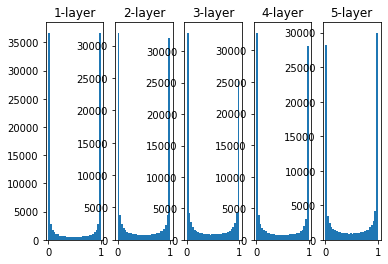

In [96]:
# 히스토그램 그리기
for i,a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + '-layer')
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

### 오버피팅

오버피팅은 주로 다음과 같은 경우에 일어난다.
    
    * 매개변수가 많고 표현력이 높은 모델
    * 훈련 데이터가 적음

In [ ]:
# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# 훈련
network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)
optimizer = SGD(lr=.01) # 학습률이 .01인 SGD로 매개변수 갱신

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size) 
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)
    
if i % iter_per_epoch == 0:
    train_acc = network.accuracy(x_train, t_train)
    test_acc = network.accuracy(x_test, t_test)
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
    
    epoch_cnt += 1
    if epoch_cnt >= max_epochs:
        break

<img src="../deep_learning_images/over.png" width="50%" height="20%" />

이런 오버피팅을 방지하기 위해 가중치 감소와 드롭아웃이라는 방법이 있다.

### 드롭아웃

뉴런을 임의로 삭제하면서 학습하는 방법이다.

<img src="../deep_learning_images/dropout.png" width="50%" height="20%" />

In [98]:
class Dropout:
    def __init__(self, dropout_ratio=.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None
        
    def forward(self, x, train_flg=True):
        if train_flg:
            self.mask = np.rando.rand(*x.shape) > self.dropout_ratio
            return x *self.mask
        else:
            return x * (1.0 - self.dropout_ratio)
        
    def backward(self, dout):
        return dout * self.mask

왼쪽이 드롭아웃을 적용 안해준 결과고 오른쪽은 적용해준 결과이다. 오버피팅이 해결된 걸 볼 수 있다.

<img src="../deep_learning_images/dropout2.png" width="70%" height="20%" />

### 검증 데이터

하이퍼파라미터의 성능을 평가할 떄는 시험 데이터를 절대로 사용하면 안된다.

그래서 하이퍼파라미터를 조정할 때는 하이퍼파라미터 전용 확인 데이터가 필요하다.

일반적으로 전용 확인 데이터를 검증 데이터라 부른다.

In [99]:
(x_train, t_train), (x_test, t_test) = load_mnist()

# 훈련 데이터를 뒤섞는다.
x_train, t_train = shuffle_dataset(x_train, t_train)

# 20%를 검증 데이터로 분할
validation_rate = .2
validation_num = int(x_train.shape[0] * validation_rate)

x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]

NameError: name 'shuffle_dataset' is not defined

### 하이퍼파라미터 최적화

0. 하이퍼파라미터 값의 범위를 설정합니다.


1. 설정된 범위에서 하이퍼파라미터 값을 무작위로 추출합니다.


2. 1단계에서 샘플링한 하이퍼파라미터 값을 사용하여 학습하고, 검증 데이터로 정확도를 평가합니다.(단, 에폭은 작게 설정)


3. 1단계와 2단계를 특정횟수(100회 등) 반복하여, 그 정확도의 결과를 보고 하이퍼파라미터 범위를 좁힙니다.

###  하이퍼파라미터 최적화 구현하기 

폴더 ch06에서 hyperparameter_optimization.py 참고

## 이번 장에서 배운 내용
    
    * 매개변수 갱신 방법에는 확률적 경사 강하법(SGD) 외에도 모멘텀, AdaGrad, Adam 등이 있다.
    * 가중치 초깃값을 정하는 방법은 올바른 학습을 하는 데 매우 중요하다.
    * 가중치의 초깃값으로는 'Xavier 초깃값'과 'He 초깃값'이 효과적이다.
    * 배치 정규화를 이용하면 학습을 빠르게 진행할 수 있으며, 초깃값에 영향을 덜 받게 된다.
    * 오버피팅을 억제하는 정규화 기술로는 가중치 감소와 드롭아웃이 있다.
    * 하이퍼파라미터 값 탐색은 최적 값이 존재할 법한 범위를 점차 좁히면서 하는 것이 효과적이다.